# **Objectives:**
- Build a streamlined inference pipeline for both classification and captioning
- Create interactive code for dynamic image input and prediction
- Present final results in an organized, visually engaging format

# Setup

In [1]:
!pip install python-dotenv google-api-python-client

from google.colab import drive
drive.mount('/content/drive')

import os
from dotenv import load_dotenv
load_dotenv("/content/drive/MyDrive/Professional/Portfolio/Deep Learning/.envs/.env_github")
github_pat = os.getenv("GITHUB_PAT")
print(f"✅ GITHUB_PAT loaded successfully")
if not github_pat:
    raise ValueError("❌ Error: 'GITHUB_PAT' is missing or invalid in your .env file.")

!git clone https://{github_pat}@github.com/vmagdale2/Deep-Learning-Classification-Captions.git

import sys
sys.path.append('/content/Deep-Learning-Classification-Captions.git/utils')
%cd /content/Deep-Learning-Classification-Captions/utils
!pwd
!ls

Mounted at /content/drive
✅ GITHUB_PAT loaded successfully
Cloning into 'Deep-Learning-Classification-Captions'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 53 (delta 21), reused 38 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 212.30 KiB | 9.65 MiB/s, done.
Resolving deltas: 100% (21/21), done.
/content/Deep-Learning-Classification-Captions/utils
/content/Deep-Learning-Classification-Captions/utils
utils.py


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from utils import display_predictions

In [3]:
MODEL_PATH = '/content/drive/MyDrive/Professional/Portfolio/Deep Learning/Models/model_3.keras'
X_TEST_PATH = '/content/drive/MyDrive/Professional/Portfolio/Deep Learning/Data/X_test.npy'

In [4]:
class_names = ['Minor Damage', 'Severe Damage']

In [5]:
model = load_model(MODEL_PATH)
X_test = np.load(X_TEST_PATH)

# Predictions

In [9]:
pred_probs = model.predict(X_test)
pred_classes = np.argmax(pred_probs, axis=1)
captions = [f"{class_names[i]} ({pred_probs[i][i]*100:.2f}%)" for i in pred_classes]


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 519ms/step


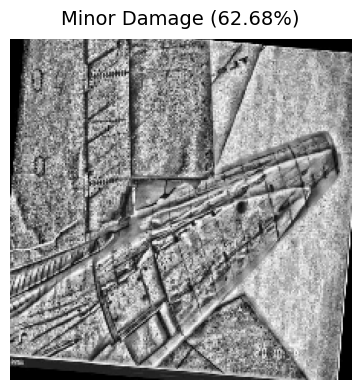

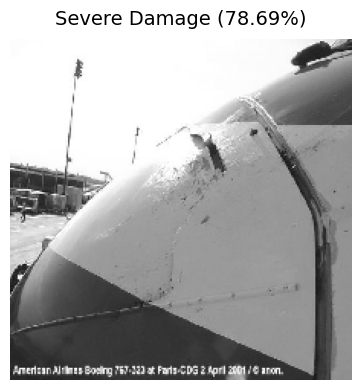

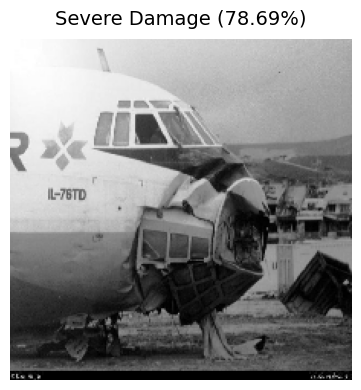

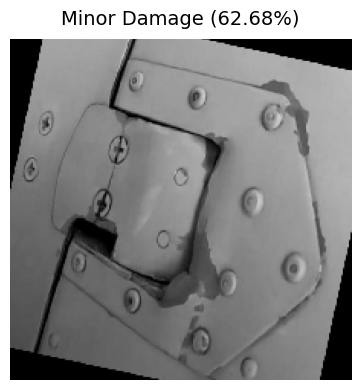

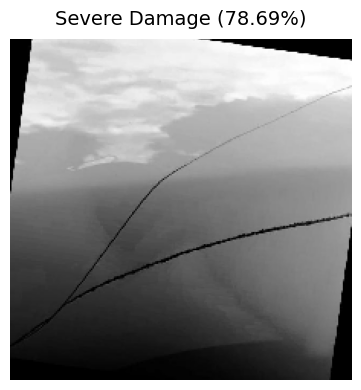

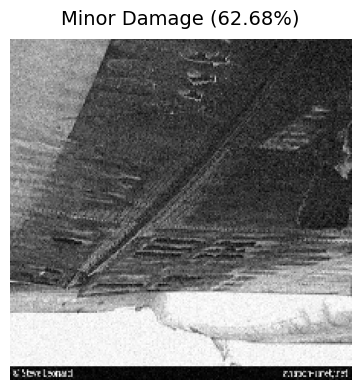

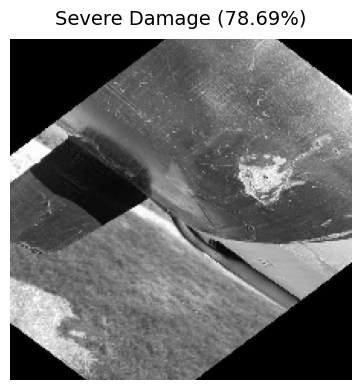

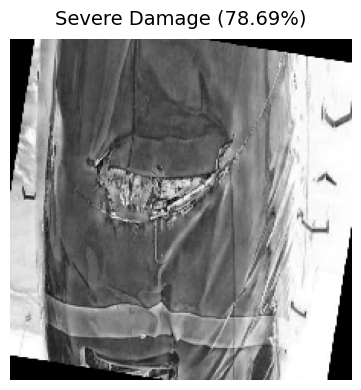

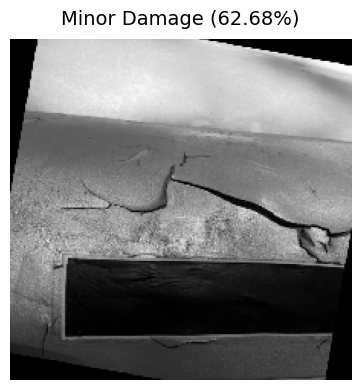

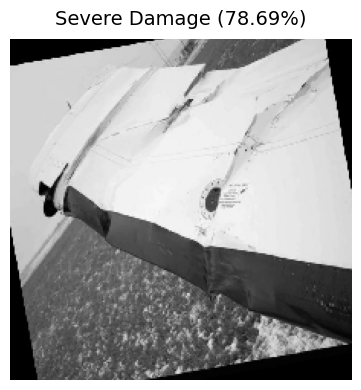

In [10]:
sample_images = X_test[:10]
sample_captions = captions[:10]
display_predictions(sample_images, sample_captions)